In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
city = "Norden, Bremen, Hamburg, Hannover, Berlin, Leipzig, Nurnberg, Munich, Ulm, Stuttgart, Karlsruhe, Frankfurt, Koln, Dusseldorf, Essen, Dortmund"

N = 16

city_list = [c.strip() for c in city.split(',')]
G = nx.Graph()
G.add_nodes_from(city_list)

# Define physical links (edges) based on a typical German backbone topology
edges = [
    ("Norden", "Bremen"), ("Norden","Dortmund"), ("Bremen", "Hamburg"), ("Hamburg", "Hannover"),
    ("Hannover", "Berlin"), ("Hannover", "Bremen"), ("Berlin", "Leipzig"), ("Leipzig", "Nurnberg"), ("Nurnberg", "Munich"), 
    ("Munich", "Ulm"), ("Ulm", "Stuttgart"), ("Stuttgart", "Karlsruhe"), ("Frankfurt", "Koln"), 
    ("Koln", "Dusseldorf"), ("Dusseldorf", "Essen"), ("Essen", "Dortmund"), ("Dortmund", "Hannover"),
    ("Frankfurt", "Hannover"), ("Koln", "Dortmund"), ("Hamburg", "Berlin"), ("Hannover", "Leipzig"), 
    ("Leipzig", "Frankfurt"), ("Frankfurt", "Nurnberg"), ("Stuttgart","Nurnberg"), ("Frankfurt", "Karlsruhe")
]
G.add_edges_from(edges)

# Create the adjacency matrix
adj_matrix = nx.to_numpy_array(G)
df_topology = pd.DataFrame(adj_matrix, index=G.nodes(), columns=G.nodes())

In [3]:
df_topology

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bremen,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hamburg,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hannover,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Berlin,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leipzig,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Nurnberg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Munich,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Stuttgart,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
degrees = df_topology.sum(axis=1)
print("Degrees of each node:")
print(degrees)

Degrees of each node:
Norden        2.0
Bremen        3.0
Hamburg       3.0
Hannover      6.0
Berlin        3.0
Leipzig       4.0
Nurnberg      4.0
Munich        2.0
Ulm           2.0
Stuttgart     3.0
Karlsruhe     2.0
Frankfurt     5.0
Koln          3.0
Dusseldorf    2.0
Essen         2.0
Dortmund      4.0
dtype: float64


In [5]:
min_degree = degrees.min()
max_degree = degrees.max()
avg_degree = degrees.mean()

print(f"Minimum degree: {min_degree}")
print(f"Maximum degree: {max_degree}")
print(f"Average degree: {avg_degree:.2f}")

Minimum degree: 2.0
Maximum degree: 6.0
Average degree: 3.12


In [6]:
# 3. Variance of degree
var_degree = degrees.var(ddof=0)  # population variance
# If you prefer sample variance, use ddof=1

print(f"Variance of degree: {var_degree:.2f}")

Variance of degree: 1.36


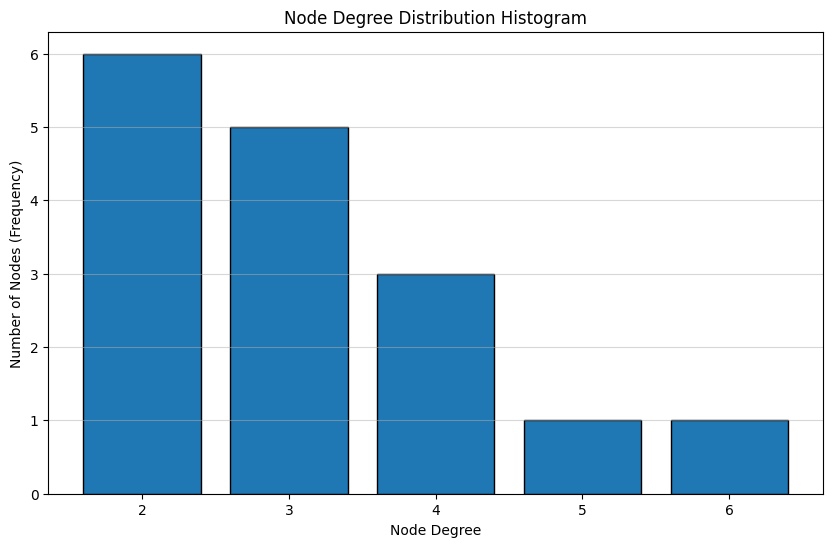

In [7]:
bins = np.arange(min_degree - 0.5, max_degree + 1.5, 1)

degrees.plot(kind='hist', 
             bins=bins,
             edgecolor='black',
             rwidth=0.8,
             figsize=(10, 6))
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes (Frequency)')
plt.title('Node Degree Distribution Histogram')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [8]:
weighted_matrix = df_topology.copy()

In [9]:
weighted_matrix.loc['Norden', 'Bremen'] = 121.73
weighted_matrix.loc['Bremen', 'Norden'] = 121.73

weighted_matrix.loc['Norden', 'Dortmund'] = 232.84
weighted_matrix.loc['Dortmund', 'Norden'] = 232.84

weighted_matrix.loc['Bremen', 'Hamburg'] = 94.8
weighted_matrix.loc['Hamburg', 'Bremen'] = 94.8

weighted_matrix.loc['Hamburg', 'Hannover'] = 131.22
weighted_matrix.loc['Hannover', 'Hamburg'] = 131.22

weighted_matrix.loc['Hamburg', 'Berlin'] = 256.28
weighted_matrix.loc['Berlin', 'Hamburg'] = 256.28

weighted_matrix.loc['Hannover', 'Berlin'] = 250.91
weighted_matrix.loc['Berlin', 'Hannover'] = 250.91

weighted_matrix.loc['Hannover', 'Bremen'] = 101
weighted_matrix.loc['Bremen', 'Hannover'] = 101

weighted_matrix.loc['Hannover', 'Leipzig'] = 215.78
weighted_matrix.loc['Leipzig', 'Hannover'] = 215.78

weighted_matrix.loc['Hannover', 'Frankfurt'] = 262.53
weighted_matrix.loc['Frankfurt', 'Hannover'] = 262.53

weighted_matrix.loc['Hannover', 'Dortmund'] = 183.11
weighted_matrix.loc['Dortmund', 'Hannover'] = 183.11

weighted_matrix.loc['Berlin', 'Leipzig'] = 149.91
weighted_matrix.loc['Leipzig', 'Berlin'] = 149.91

weighted_matrix.loc['Leipzig', 'Nurnberg'] = 230.08
weighted_matrix.loc['Nurnberg', 'Leipzig'] = 230.08

weighted_matrix.loc['Leipzig', 'Frankfurt'] = 294.3
weighted_matrix.loc['Frankfurt', 'Leipzig'] = 294.3

weighted_matrix.loc['Nurnberg', 'Munich'] = 151.51
weighted_matrix.loc['Munich', 'Nurnberg'] = 151.51

weighted_matrix.loc['Nurnberg', 'Stuttgart'] = 157.87
weighted_matrix.loc['Stuttgart', 'Nurnberg'] = 157.87

weighted_matrix.loc['Nurnberg', 'Frankfurt'] = 186.99
weighted_matrix.loc['Frankfurt', 'Nurnberg'] = 186.99

weighted_matrix.loc['Munich', 'Ulm'] = 122.06
weighted_matrix.loc['Ulm', 'Munich'] = 122.06

weighted_matrix.loc['Stuttgart', 'Karlsruhe'] = 62.93
weighted_matrix.loc['Karlsruhe', 'Stuttgart'] = 62.93

weighted_matrix.loc['Karlsruhe', 'Frankfurt'] = 124.12
weighted_matrix.loc['Frankfurt', 'Karlsruhe'] = 124.12

weighted_matrix.loc['Frankfurt', 'Koln'] = 152.52
weighted_matrix.loc['Koln', 'Frankfurt'] = 152.52

weighted_matrix.loc['Koln', 'Dusseldorf'] = 34.25
weighted_matrix.loc['Dusseldorf', 'Koln'] = 34.25

weighted_matrix.loc['Koln', 'Dortmund'] = 73.17
weighted_matrix.loc['Dortmund', 'Koln'] = 73.17

weighted_matrix.loc['Dusseldorf', 'Essen'] = 31.56
weighted_matrix.loc['Essen', 'Dusseldorf'] = 31.56

weighted_matrix.loc['Essen', 'Dortmund'] = 31.63
weighted_matrix.loc['Dortmund', 'Essen'] = 31.63

In [10]:
weighted_matrix

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.00,121.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,232.84
Bremen,121.73,0.00,94.80,101.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hamburg,0.00,94.80,0.00,131.22,256.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hannover,0.00,101.00,131.22,0.00,250.91,215.78,0.00,0.00,0.00,0.00,0.00,262.53,0.00,0.00,0.00,183.11
Berlin,0.00,0.00,256.28,250.91,0.00,149.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Leipzig,0.00,0.00,0.00,215.78,149.91,0.00,230.08,0.00,0.00,0.00,0.00,294.30,0.00,0.00,0.00,0.00
Nurnberg,0.00,0.00,0.00,0.00,0.00,230.08,0.00,151.51,0.00,157.87,0.00,186.99,0.00,0.00,0.00,0.00
Munich,0.00,0.00,0.00,0.00,0.00,0.00,151.51,0.00,122.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ulm,0.00,0.00,0.00,0.00,0.00,0.00,0.00,122.06,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
Stuttgart,0.00,0.00,0.00,0.00,0.00,0.00,157.87,0.00,1.00,0.00,62.93,0.00,0.00,0.00,0.00,0.00


In [11]:
weighted_matrix = weighted_matrix*1.8

In [12]:
weighted_matrix

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.000,219.114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,419.112
Bremen,219.114,0.000,170.640,181.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Hamburg,0.000,170.640,0.000,236.196,461.304,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Hannover,0.000,181.800,236.196,0.000,451.638,388.404,0.000,0.000,0.000,0.000,0.000,472.554,0.000,0.000,0.000,329.598
Berlin,0.000,0.000,461.304,451.638,0.000,269.838,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Leipzig,0.000,0.000,0.000,388.404,269.838,0.000,414.144,0.000,0.000,0.000,0.000,529.740,0.000,0.000,0.000,0.000
Nurnberg,0.000,0.000,0.000,0.000,0.000,414.144,0.000,272.718,0.000,284.166,0.000,336.582,0.000,0.000,0.000,0.000
Munich,0.000,0.000,0.000,0.000,0.000,0.000,272.718,0.000,219.708,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ulm,0.000,0.000,0.000,0.000,0.000,0.000,0.000,219.708,0.000,1.800,0.000,0.000,0.000,0.000,0.000,0.000
Stuttgart,0.000,0.000,0.000,0.000,0.000,0.000,284.166,0.000,1.800,0.000,113.274,0.000,0.000,0.000,0.000,0.000


In [13]:
from routing_v2_proj import Graph 

Number of Nodes:
8
Number of links:
12.0
Average Node Degree:
[3.0]
Network Diameter:
[np.int64(3)]
Average Number of Hops per Demand:
[np.float64(1.8214285714285714)]
Minimum link length:
10.0
Maximum link length:
40.0
Average link length:
17.5
Total Number of Paths:
56
Ordered Paths:
Path: [1, 2] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[1, 2]])
Path: [2, 1] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[2, 1]])
Path: [1, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[1, 3]])
Path: [3, 1] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 1]])
Path: [2, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[2, 3]])
Path: [3, 2] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 2]])
Path: [3, 4] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 4]])
Path: [4, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[4, 3]])
Path: [3, 5] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 5]])
Path: [5, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og.

In [14]:
weighted_list = weighted_matrix.values.tolist()
unweighted_list = df_topology.values.tolist()
print(f"Weighted matrix shape: {len(weighted_list)}x{len(weighted_list[0])}")
print(f"Unweighted matrix shape: {len(unweighted_list)}x{len(unweighted_list[0])}")

Weighted matrix shape: 16x16
Unweighted matrix shape: 16x16


In [15]:
# For UNWEIGHTED Graph

import routing_v2_proj as routing

# Create graph object
graph = routing.Graph()

# 1. Get shortest paths for UNWEIGHTED graph
print("=== UNWEIGHTED GRAPH ===")
unweighted_paths = routing.shortestPaths(graph, unweighted_list)

# 2. Count hops
hop_matrix_unweighted = routing.countHops(unweighted_paths)

print(f"Number of nodes: {len(unweighted_list)}")
print(f"Hop matrix (sample): {hop_matrix_unweighted[:3]}")

=== UNWEIGHTED GRAPH ===
Number of nodes: 16
Hop matrix (sample): [[0, 1, 2, 2, 3, 3, 4, 5, 6, 5, 4, 3, 2, 3, 2, 1], [1, 0, 1, 1, 2, 2, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2], [2, 1, 0, 1, 1, 2, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2]]


In [16]:
# For WEIGHTED Graph

print("\n=== WEIGHTED GRAPH ===")
weighted_paths = routing.shortestPaths(graph, weighted_list)

# Count hops for weighted (but uses distances)
hop_matrix_weighted = routing.countHops(weighted_paths)

# To get distances, you need to extract them from paths
def extract_distances_and_paths(paths_list):
    """Extract distances and paths for all node pairs"""
    all_distances = []
    all_paths = []
    
    for src_paths in paths_list:
        for p in src_paths:
            all_distances.append({
                'source': p['source'],
                'destination': p['destination'],
                'distance': p['distance'],
                'path': p['path'][0] if p['path'] else []  # Take first shortest path
            })
    
    return all_distances

weighted_distances = extract_distances_and_paths(weighted_paths)
unweighted_distances = extract_distances_and_paths(unweighted_paths)


=== WEIGHTED GRAPH ===


In [17]:
print(f"Sample weighted path: {weighted_distances[38]}")

Sample weighted path: {'source': 3, 'destination': 7, 'distance': 1038.7440000000001, 'path': [3, 4, 6, 7]}


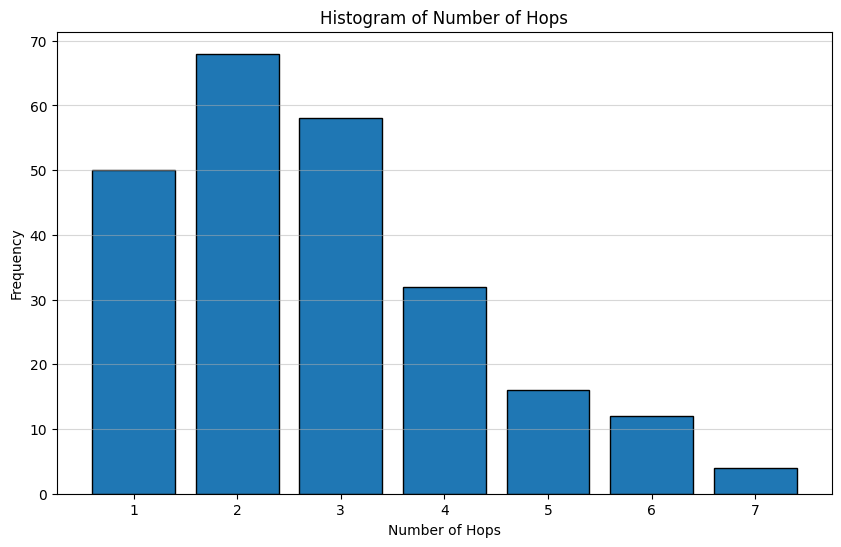

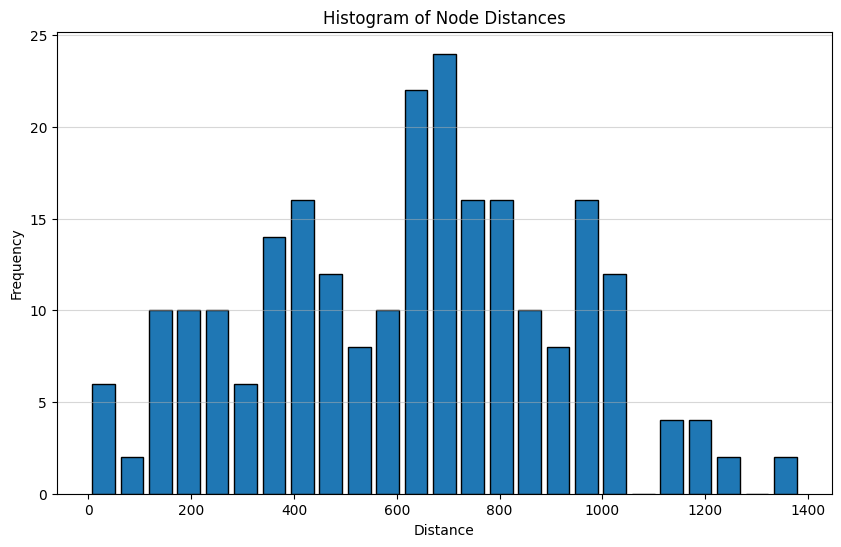

In [18]:
# Extract hops and distances
hops_data = []
distances_data = []

for item in weighted_distances:
    if item["source"] != item["destination"]:
        # Number of hops = number of nodes in path - 1
        hops = len(item["path"]) - 1
        hops_data.append(hops)
        distances_data.append(item["distance"])

# -----------------------------
# Histogram: Number of Hops
# -----------------------------
plt.figure(figsize=(10, 6))

# Discrete bins centered on integers
bins_hops = np.arange(min(hops_data) - 0.5, max(hops_data) + 1.5, 1)
plt.hist(hops_data, bins=bins_hops, edgecolor="black", rwidth=0.8)

plt.xlabel("Number of Hops")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Hops")
plt.grid(axis="y", alpha=0.5)
plt.show()

# -----------------------------
# Histogram: Distances
# -----------------------------
plt.figure(figsize=(10, 6))

plt.hist(distances_data, bins=25, edgecolor="black", rwidth=0.8)

plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Node Distances")
plt.grid(axis="y", alpha=0.5)
plt.show()

# ahmad says "these are when we talk aboyt distances it becomes more dunamic becaise they are continuous, but we can still see that the distances are 600 or something, and in" low hops, mostly, a few with longer hops, so well connected i guess. 

In [19]:
N_bi = N*(N-1)/2


In [20]:

hop_matrix_unweighted

[[0, 1, 2, 2, 3, 3, 4, 5, 6, 5, 4, 3, 2, 3, 2, 1],
 [1, 0, 1, 1, 2, 2, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2],
 [2, 1, 0, 1, 1, 2, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2],
 [2, 1, 1, 0, 1, 1, 2, 3, 4, 3, 2, 1, 2, 3, 2, 1],
 [3, 2, 1, 1, 0, 1, 2, 3, 4, 3, 3, 2, 3, 4, 3, 2],
 [3, 2, 2, 1, 1, 0, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2],
 [4, 3, 3, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 3, 4, 3],
 [5, 4, 4, 3, 3, 2, 1, 0, 1, 2, 3, 2, 3, 4, 5, 4],
 [6, 5, 5, 4, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 5],
 [5, 4, 4, 3, 3, 2, 1, 2, 1, 0, 1, 2, 3, 4, 5, 4],
 [4, 3, 3, 2, 3, 2, 2, 3, 2, 1, 0, 1, 2, 3, 4, 3],
 [3, 2, 2, 1, 2, 1, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2],
 [2, 3, 3, 2, 3, 2, 2, 3, 4, 3, 2, 1, 0, 1, 2, 1],
 [3, 4, 4, 3, 4, 3, 3, 4, 5, 4, 3, 2, 1, 0, 1, 2],
 [2, 3, 3, 2, 3, 3, 4, 5, 6, 5, 4, 3, 2, 1, 0, 1],
 [1, 2, 2, 1, 2, 2, 3, 4, 5, 4, 3, 2, 1, 2, 1, 0]]

In [21]:
# for the hop matrix, doing the same thing. 
# Total 1s in upper triangle (excluding diagonal)
sum_h = int(np.triu(np.array(hop_matrix_unweighted), k=1).sum())

sum_h

315

In [22]:
avg_no_hops_per_demand = sum_h/N_bi
avg_no_hops_per_demand

2.625

In [23]:
semi_emp_avg_no_hops_per_demand_1 = np.sqrt((N-2)/(avg_degree-1))
semi_emp_avg_no_hops_per_demand_1

np.float64(2.5667557916789914)

In [24]:
semi_emp_avg_no_hops_per_demand_2 = 1.12*np.sqrt((N)/(avg_degree))
semi_emp_avg_no_hops_per_demand_2

np.float64(2.5342707037725867)

## Looking at the logical topology of the network, which is a fully connected.

In [25]:
H = np.array(hop_matrix_unweighted)
N = len(city_list)

G_logical = nx.Graph()
G_logical.add_nodes_from(city_list)

for i in range(N):
    for j in range(i + 1, N):
        G_logical.add_edge(
            city_list[i],
            city_list[j],
            hops=int(H[i, j])
        )

In [26]:
G_logical

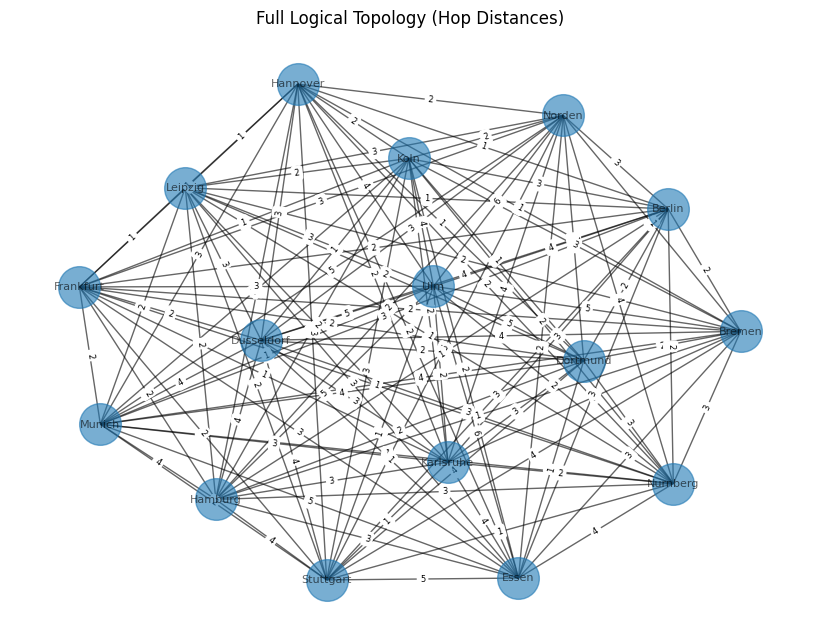

In [27]:
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G_logical, seed=42)

nx.draw(
    G_logical, pos,
    with_labels=True,
    node_size=900,
    font_size=8,
    alpha=0.6
)

edge_labels = nx.get_edge_attributes(G_logical, "hops")
nx.draw_networkx_edge_labels(
    G_logical, pos,
    edge_labels=edge_labels,
    font_size=6
)

plt.title("Full Logical Topology (Hop Distances)")
plt.show()

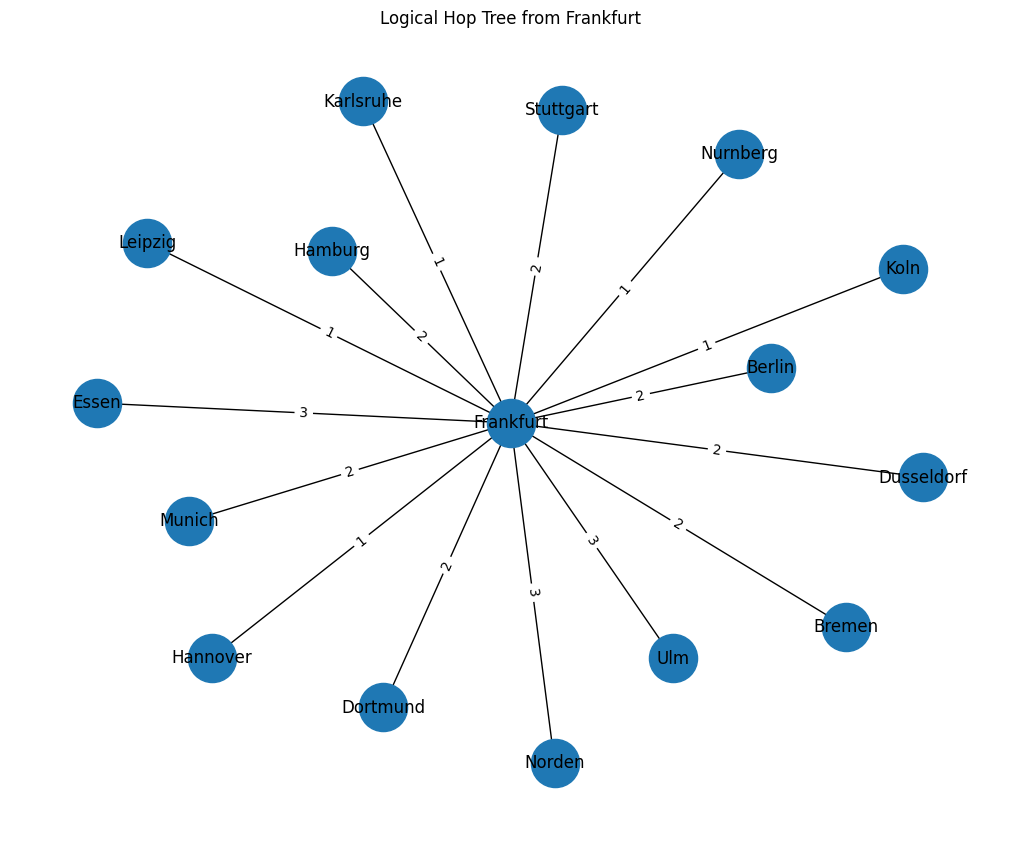

In [28]:
root = "Frankfurt"

tree = nx.single_source_shortest_path_length(G, root)

G_tree = nx.Graph()
for dst, hops in tree.items():
    if dst != root:
        G_tree.add_edge(root, dst, hops=hops)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_tree, seed=42)

nx.draw(G_tree, pos, with_labels=True, node_size=1200)
nx.draw_networkx_edge_labels(
    G_tree, pos,
    edge_labels=nx.get_edge_attributes(G_tree, "hops")
)

plt.title(f"Logical Hop Tree from {root}")
plt.show()

In [29]:
# Minimum node degree
min_degree = min(dict(G.degree()).values())

# Node connectivity
node_connectivity = nx.node_connectivity(G)

# Edge connectivity
edge_connectivity = nx.edge_connectivity(G)

# Algebraic connectivity
algebraic_connectivity = nx.algebraic_connectivity(G)


print(f"Minimum node degree δ(G): {min_degree}")
print(f"Node connectivity κ(G): {node_connectivity}")
print(f"Edge connectivity λ(G): {edge_connectivity}")
print(f"Algebraic connectivity μ₂: {algebraic_connectivity:.4f}")


Minimum node degree δ(G): 2
Node connectivity κ(G): 2
Edge connectivity λ(G): 2
Algebraic connectivity μ₂: 0.3393


algebraic connectivity score is 0.3393 which is < 0.5 i.e. the network is not well connected. This is expected as we only have 25 links out of 16*16 = 256 possible links between the 16 nodes. 

Minimum X-Y edge cut set and node cut set

In [30]:
X = "Hamburg"
Y = "Stuttgart"

# Minimum x–y edge cut
edge_cut = nx.minimum_edge_cut(G, X, Y)

print("Edge cutset:")
print(edge_cut)
print("Cut size:", len(edge_cut))

Edge cutset:
{('Nurnberg', 'Stuttgart'), ('Karlsruhe', 'Stuttgart'), ('Ulm', 'Stuttgart')}
Cut size: 3


In [31]:
# Minimum x–y node cut
node_cut = nx.minimum_node_cut(G, X, Y)

print("Node cutset:")
print(node_cut)
print("Cut size:", len(node_cut))

Node cutset:
{'Karlsruhe', 'Nurnberg'}
Cut size: 2


Service path and back up paths

In [32]:
# for unweighted graph

x = "Hamburg"
y = "Stuttgart"

# Service (primary) path: minimum-hop path
service_path = nx.shortest_path(G, x, y)

print("Service path:")
print(service_path)
print("Hops:", len(service_path) - 1)

Service path:
['Hamburg', 'Hannover', 'Frankfurt', 'Karlsruhe', 'Stuttgart']
Hops: 4


In [33]:
# All simple paths between x and y
all_paths = list(nx.all_simple_paths(G, x, y))

print(f"Total simple paths: {len(all_paths)}")

Total simple paths: 151


In [34]:
# 1) Select service path (shortest path in hops)
service_path = nx.shortest_path(G, x, y)
print("\nService path:")
print(service_path, "hops:", len(service_path) - 1)

# 2) Store USED edges (service path first)
used_edges = set(
    frozenset((u, v)) for u, v in zip(service_path[:-1], service_path[1:])
)

# 3) Sort all paths by hop count
all_paths_sorted = sorted(all_paths, key=lambda p: len(p) - 1)

# 4) Select mutually edge-disjoint backup paths
edge_disjoint_backups = []

for path in all_paths_sorted:
    path_edges = set(
        frozenset((u, v)) for u, v in zip(path[:-1], path[1:])
    )
    if path_edges.isdisjoint(used_edges):
        edge_disjoint_backups.append(path)
        used_edges.update(path_edges)  # reserve edges

    if len(edge_disjoint_backups) == 3:  # limit number of backups
        break

# 5) Print results
print("\nMutually edge-disjoint backup paths:")
for p in edge_disjoint_backups:
    print(p, "hops:", len(p) - 1)



Service path:
['Hamburg', 'Hannover', 'Frankfurt', 'Karlsruhe', 'Stuttgart'] hops: 4

Mutually edge-disjoint backup paths:
['Hamburg', 'Berlin', 'Leipzig', 'Nurnberg', 'Stuttgart'] hops: 4
['Hamburg', 'Bremen', 'Hannover', 'Leipzig', 'Frankfurt', 'Nurnberg', 'Munich', 'Ulm', 'Stuttgart'] hops: 8


In [35]:
# 1) Select the service path (shortest path in hops)
service_path = nx.shortest_path(G, x, y)
print("\nService path:")
print(service_path, "hops:", len(service_path) - 1)

# 2) Store USED nodes (exclude source and destination)
used_nodes = set(service_path[1:-1])

# 3) Sort all paths by hop count
all_paths_sorted = sorted(all_paths, key=lambda p: len(p) - 1)

# 4) Select mutually node-disjoint backup paths
node_disjoint_backups = []

for path in all_paths_sorted:
    path_nodes = set(path[1:-1])  # intermediate nodes only

    if path_nodes.isdisjoint(used_nodes):
        node_disjoint_backups.append(path)
        used_nodes.update(path_nodes)  # reserve nodes

    if len(node_disjoint_backups) == 3:  # limit backups
        break

# 5) Print results
print("\nMutually node-disjoint backup paths:")
for p in node_disjoint_backups:
    print(p, "hops:", len(p) - 1)



Service path:
['Hamburg', 'Hannover', 'Frankfurt', 'Karlsruhe', 'Stuttgart'] hops: 4

Mutually node-disjoint backup paths:
['Hamburg', 'Berlin', 'Leipzig', 'Nurnberg', 'Stuttgart'] hops: 4


Same but for weighted graphs.

In [36]:
# for unweighted graph

x = "Hamburg"
y = "Stuttgart"

# Building the weighted graph
Gw = nx.Graph()

for i in weighted_matrix.index:
    for j in weighted_matrix.columns:
        w = weighted_matrix.loc[i, j]
        if w > 0:
            Gw.add_edge(i, j, weight=w)



In [37]:
# 1) Service path (shortest distance)
service_path = nx.shortest_path(Gw, x, y, weight="weight")
service_dist = nx.shortest_path_length(Gw, x, y, weight="weight")

print("\nWeighted service path:")
print(service_path, "distance:", service_dist)

# 2) Store used edges (unordered)
used_edges = set(
    frozenset((u, v)) for u, v in zip(service_path[:-1], service_path[1:])
)

# 3) Generate candidate paths ordered by total distance
candidate_paths = list(nx.shortest_simple_paths(Gw, x, y, weight="weight"))

# 4) Select mutually edge-disjoint backup paths
edge_disjoint_backups = []

for path in candidate_paths:
    path_edges = set(
        frozenset((u, v)) for u, v in zip(path[:-1], path[1:])
    )

    if path_edges.isdisjoint(used_edges):
        edge_disjoint_backups.append(path)
        used_edges.update(path_edges)

    if len(edge_disjoint_backups) == 3:
        break

# 5) Print results
print("\nWeighted mutually edge-disjoint backup paths:")
for p in edge_disjoint_backups:
    dist = nx.path_weight(Gw, p, weight="weight")
    print(p, "distance:", dist)



Weighted service path:
['Hamburg', 'Hannover', 'Frankfurt', 'Karlsruhe', 'Stuttgart'] distance: 1045.44

Weighted mutually edge-disjoint backup paths:
['Hamburg', 'Berlin', 'Leipzig', 'Nurnberg', 'Stuttgart'] distance: 1429.452
['Hamburg', 'Bremen', 'Hannover', 'Dortmund', 'Koln', 'Frankfurt', 'Nurnberg', 'Munich', 'Ulm', 'Stuttgart'] distance: 1919.0880000000002


In [38]:
# 1) Service path (shortest distance)
service_path = nx.shortest_path(Gw, x, y, weight="weight")
service_dist = nx.shortest_path_length(Gw, x, y, weight="weight")

print("\nWeighted service path:")
print(service_path, "distance:", service_dist)

# 2) Store used intermediate nodes
used_nodes = set(service_path[1:-1])

# 3) Generate candidate paths ordered by total distance
candidate_paths = list(nx.shortest_simple_paths(Gw, x, y, weight="weight"))

# 4) Select mutually node-disjoint backup paths
node_disjoint_backups = []

for path in candidate_paths:
    path_nodes = set(path[1:-1])  # intermediate nodes only

    if path_nodes.isdisjoint(used_nodes):
        node_disjoint_backups.append(path)
        used_nodes.update(path_nodes)

    if len(node_disjoint_backups) == 3:
        break

# 5) Print results
print("\nWeighted mutually node-disjoint backup paths:")
for p in node_disjoint_backups:
    dist = nx.path_weight(Gw, p, weight="weight")
    print(p, "distance:", dist)



Weighted service path:
['Hamburg', 'Hannover', 'Frankfurt', 'Karlsruhe', 'Stuttgart'] distance: 1045.44

Weighted mutually node-disjoint backup paths:
['Hamburg', 'Berlin', 'Leipzig', 'Nurnberg', 'Stuttgart'] distance: 1429.452


Phase 3

Traffic matrix and demand matrix

In [39]:
X = 28
Y = 47
Z = 53

symbol_map = {
    "X": X,
    "Y": Y,
    "Z": Z,
    "0": 0
}

In [40]:
traffic_symbols = [
    ["0","X","Y","Z","X","Y","0","X","Y","0","X","0","0","0","0","0"],
    ["X","0","X","Y","0","X","0","Z","X","Y","Z","0","0","Z","0","Z"],
    ["Y","X","0","X","Y","0","X","0","Z","X","0","Z","0","0","0","0"],
    ["Z","Y","X","0","X","Y","Z","0","0","Z","X","0","Z","0","0","0"],
    ["X","0","Y","X","0","X","Y","Z","0","Y","0","0","0","Z","0","Z"],
    ["Y","X","0","Y","X","0","X","Y","Z","X","Y","0","X","0","X","0"],
    ["0","0","X","Z","Y","X","0","X","Y","Z","X","0","Z","X","0","X"],
    ["X","Z","0","0","Z","Y","X","0","X","Y","Z","X","0","Z","0","Z"],
    ["0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0"],
    ["Y","X","Z","0","0","Z","Y","X","0","X","Y","Z","X","Y","X","Y"],
    ["0","Y","X","Z","Y","X","Z","Y","X","0","X","Y","Z","X","Z","X"],
    ["X","Z","0","X","0","Y","X","Z","Y","X","0","X","Y","Z","X","Z"],
    ["0","0","Z","0","0","0","0","X","Z","Y","X","0","X","Y","X","Y"],
    ["0","0","0","Z","0","X","Z","0","X","Z","Y","X","0","X","0","X"],
    ["0","0","0","0","0","0","0","0","0","0","0","0","0","0","0","0"],
    ["0","Z","0","0","Z","0","X","Z","Y","X","Z","Y","X","0","X","0"]
]

In [41]:
traffic_matrix = np.array([
    [symbol_map[v] for v in row]
    for row in traffic_symbols
])

df_traffic = pd.DataFrame(
    traffic_matrix,
    index=city_list,
    columns=city_list
)

print(df_traffic)

            Norden  Bremen  Hamburg  Hannover  Berlin  Leipzig  Nurnberg  \
Norden           0      28       47        53      28       47         0   
Bremen          28       0       28        47       0       28         0   
Hamburg         47      28        0        28      47        0        28   
Hannover        53      47       28         0      28       47        53   
Berlin          28       0       47        28       0       28        47   
Leipzig         47      28        0        47      28        0        28   
Nurnberg         0       0       28        53      47       28         0   
Munich          28      53        0         0      53       47        28   
Ulm              0       0        0         0       0        0         0   
Stuttgart       47      28       53         0       0       53        47   
Karlsruhe        0      47       28        53      47       28        53   
Frankfurt       28      53        0        28       0       47        28   
Koln        

In [42]:
zero_nodes = ["Essen", "Ulm"]
zero_indices = [city_list.index(n) for n in zero_nodes]
print(zero_indices)

[14, 8]


In [43]:
for idx in zero_indices:
    traffic_matrix[idx, :] = 0
    traffic_matrix[:, idx] = 0

In [44]:
traffic_matrix

array([[ 0, 28, 47, 53, 28, 47,  0, 28,  0,  0, 28,  0,  0,  0,  0,  0],
       [28,  0, 28, 47,  0, 28,  0, 53,  0, 47, 53,  0,  0, 53,  0, 53],
       [47, 28,  0, 28, 47,  0, 28,  0,  0, 28,  0, 53,  0,  0,  0,  0],
       [53, 47, 28,  0, 28, 47, 53,  0,  0, 53, 28,  0, 53,  0,  0,  0],
       [28,  0, 47, 28,  0, 28, 47, 53,  0, 47,  0,  0,  0, 53,  0, 53],
       [47, 28,  0, 47, 28,  0, 28, 47,  0, 28, 47,  0, 28,  0,  0,  0],
       [ 0,  0, 28, 53, 47, 28,  0, 28,  0, 53, 28,  0, 53, 28,  0, 28],
       [28, 53,  0,  0, 53, 47, 28,  0,  0, 47, 53, 28,  0, 53,  0, 53],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [47, 28, 53,  0,  0, 53, 47, 28,  0, 28, 47, 53, 28, 47,  0, 47],
       [ 0, 47, 28, 53, 47, 28, 53, 47,  0,  0, 28, 47, 53, 28,  0, 28],
       [28, 53,  0, 28,  0, 47, 28, 53,  0, 28,  0, 28, 47, 53,  0, 53],
       [ 0,  0, 53,  0,  0,  0,  0, 28,  0, 47, 28,  0, 28, 47,  0, 47],
       [ 0,  0,  0, 53,  0, 28, 53,  0,  0, 53, 47,

In [45]:
demand_matrix = (traffic_matrix > 0).astype(int)

In [46]:
demand_matrix

array([[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0]])

In [47]:
weighted_matrix

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.000,219.114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,419.112
Bremen,219.114,0.000,170.640,181.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Hamburg,0.000,170.640,0.000,236.196,461.304,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Hannover,0.000,181.800,236.196,0.000,451.638,388.404,0.000,0.000,0.000,0.000,0.000,472.554,0.000,0.000,0.000,329.598
Berlin,0.000,0.000,461.304,451.638,0.000,269.838,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Leipzig,0.000,0.000,0.000,388.404,269.838,0.000,414.144,0.000,0.000,0.000,0.000,529.740,0.000,0.000,0.000,0.000
Nurnberg,0.000,0.000,0.000,0.000,0.000,414.144,0.000,272.718,0.000,284.166,0.000,336.582,0.000,0.000,0.000,0.000
Munich,0.000,0.000,0.000,0.000,0.000,0.000,272.718,0.000,219.708,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ulm,0.000,0.000,0.000,0.000,0.000,0.000,0.000,219.708,0.000,1.800,0.000,0.000,0.000,0.000,0.000,0.000
Stuttgart,0.000,0.000,0.000,0.000,0.000,0.000,284.166,0.000,1.800,0.000,113.274,0.000,0.000,0.000,0.000,0.000


In [48]:
df_topology

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bremen,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hamburg,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hannover,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Berlin,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leipzig,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Nurnberg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Munich,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Stuttgart,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
strategies = ["shortest", "longest", "largest"]
routing.MAX_LINK_CAP = 999999  # uncapacitated

adj_list = df_topology.values.tolist()
traffic_list = traffic_matrix.tolist()

In [50]:
# Hop based routing

graph_obj = routing.Graph()
paths_hops = routing.shortestPaths(graph_obj, adj_list)
hop_matrix = routing.countHops(paths_hops)

In [51]:
# distance based routing

distance_adj_list = weighted_matrix.values.tolist()

In [52]:
# shortest path using distances
paths_dist = routing.shortestPaths(graph_obj, distance_adj_list)

In [62]:
def compute_distance_matrix(paths_dist, distance_matrix, N):
    dist_mat = [[0]*N for _ in range(N)]

    for i, row in enumerate(paths_dist):  # i = source index
        for path_info in row:
            j = path_info['destination'] - 1  # convert to 0-index
            path = path_info['path'][0]       # inner list of nodes
            if len(path) > 1:
                d = 0
                for k in range(len(path)-1):
                    u = path[k]-1  # convert node to 0-index
                    v = path[k+1]-1
                    d += distance_matrix[u][v]
                dist_mat[i][j] = d
            else:
                dist_mat[i][j] = 0  # same node
    return dist_mat


In [63]:
distance_matrix_paths = compute_distance_matrix(
    paths_dist,
    weighted_matrix.values.tolist(),
    len(city_list)
)



===== HOPS-BASED ROUTING =====

--- Strategy: shortest ---
Blocked Traffic: 0


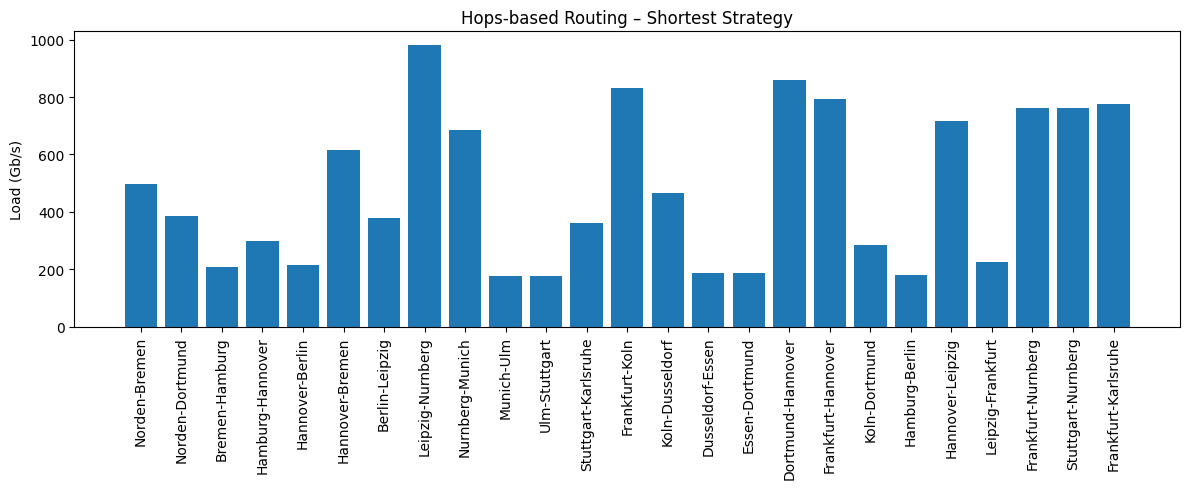


--- Strategy: longest ---
Blocked Traffic: 0


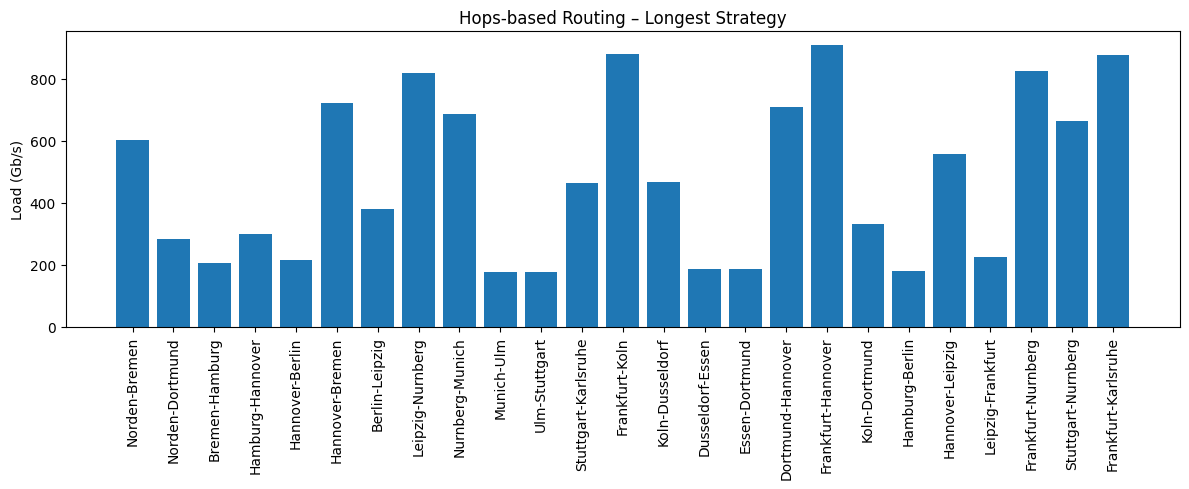


--- Strategy: largest ---
Blocked Traffic: 0


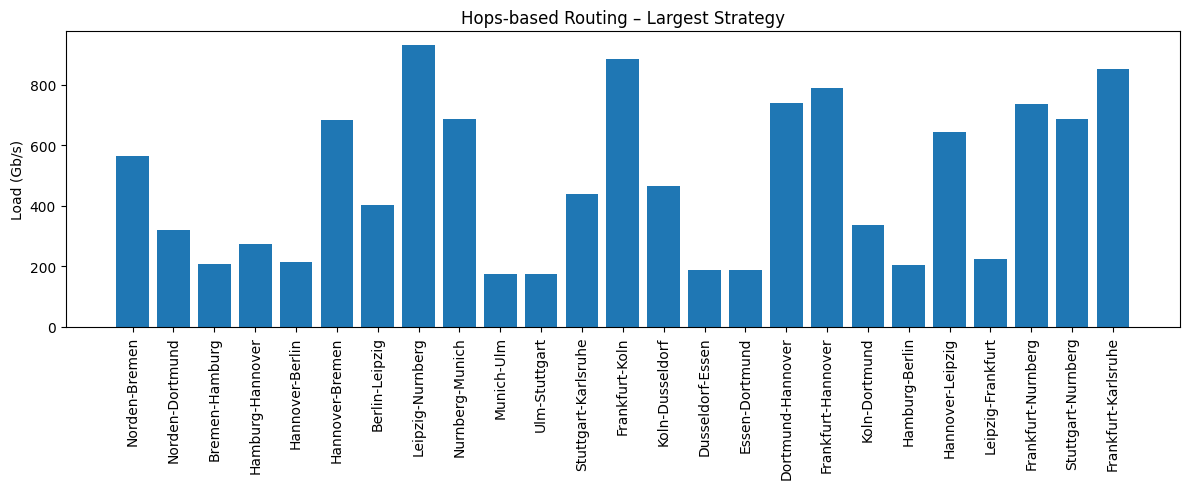


===== DISTANCE-BASED ROUTING =====

--- Strategy: shortest ---
Blocked Traffic: 0


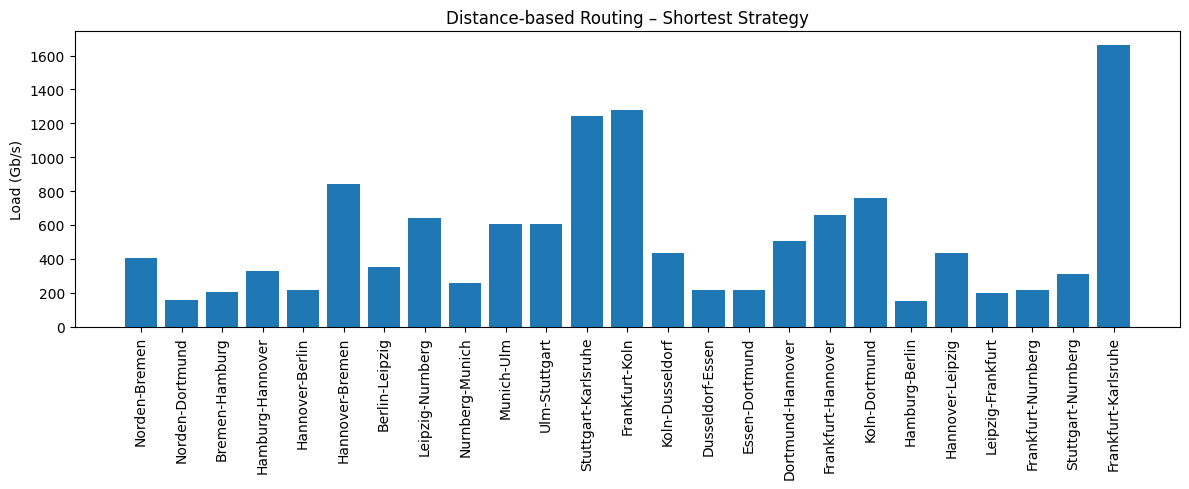


--- Strategy: longest ---
Blocked Traffic: 0


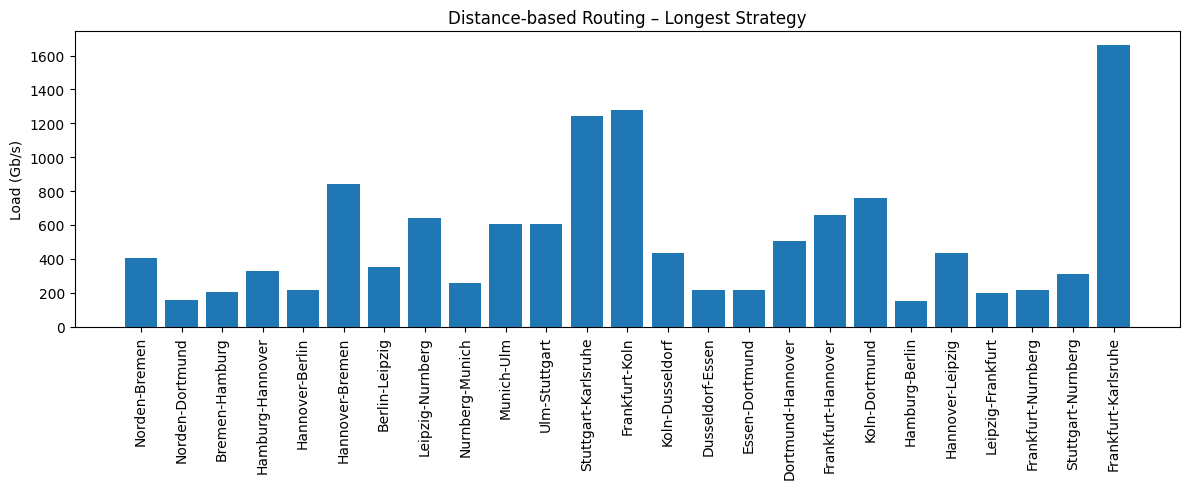


--- Strategy: largest ---
Blocked Traffic: 0


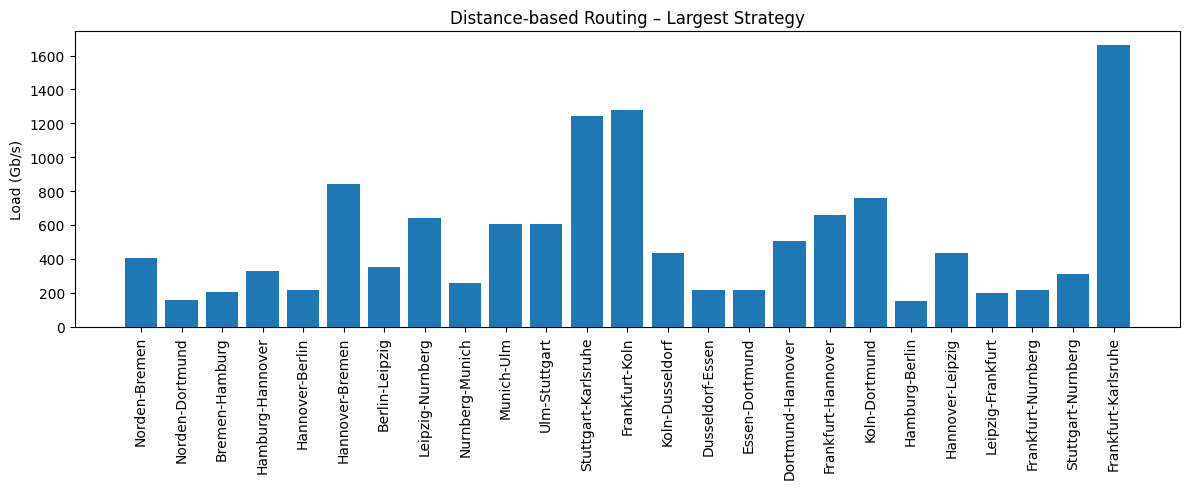

In [64]:
import numpy as np
import matplotlib.pyplot as plt

metrics = {
    "Hops": (paths_hops, hop_matrix),
    "Distance": (paths_dist, distance_matrix_paths)
}

for metric_name, (paths, metric_matrix) in metrics.items():
    print(f"\n===== {metric_name.upper()}-BASED ROUTING =====")

    for strategy in strategies:
        print(f"\n--- Strategy: {strategy} ---")

        # 1. Order paths
        ordered_ids = routing.orderPaths(
            paths,
            traffic_list,
            metric_matrix,
            order=strategy
        )

        # 2. Route traffic
        current_load_matrix = routing.create_load_matrix(adj_list)

        final_load_matrix, _, _, blocked_traffic, _ = routing.route(
            ordered_ids,
            current_load_matrix,
            [row[:] for row in adj_list]
        )

        print(f"Blocked Traffic: {blocked_traffic}")

        # 3. Extract link loads
        loads = []
        link_names = []

        for u, v in edges:
            u_idx = city_list.index(u)
            v_idx = city_list.index(v)

            load_uv = final_load_matrix[u_idx][v_idx]
            load_vu = final_load_matrix[v_idx][u_idx]

            total_load = load_uv + load_vu
            loads.append(total_load)
            link_names.append(f"{u}-{v}")

        # 4. Plot (ONE plot per strategy)
        plt.figure(figsize=(12, 5))
        plt.bar(link_names, loads)
        plt.xticks(rotation=90)
        plt.ylabel("Load (Gb/s)")
        plt.title(f"{metric_name}-based Routing – {strategy.capitalize()} Strategy")
        plt.tight_layout()
        plt.show()
